
Problem Statement
   * The goal is to understand the relationship between house features and how these
     variables affect the house price.
Task Peformed:
    1. Load Data
    2. Exploratory data analysis
    3. Check and remove any special character
    4. Handle the null Values
    5. Graphical Analysis
    6. Check and Handle the outliers
    7. Train Test Split
    8. Model building for :
        * Linear Regression
        * Ridge Regression
        * Lasso Regression
        * Support Vector Regression
        * Decision Tree Regressor
        * Random Forest Regressor
    9. check for all models:
        * mean_squared_error
        * mean_absolute_error
        * r2_score
        * Adjusted r2_score
        * Hyper-Parameter tuning using RandomSearchCV on:
                =>Random Forest Regessor
    10. Summary

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from warnings import simplefilter
import statistics
import warnings
warnings.filterwarnings("ignore")

Load Data

In [2]:
df_1= pd.read_excel('DS - Assignment Part-1 data set.xlsx')

In [3]:
df_1.shape

(414, 9)

In [4]:
df_1.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


EDA

In [6]:
df_1['Transaction date'] = df_1['Transaction date'].astype(int)
df_1['Distance from nearest Metro station (km)'] = df_1['Distance from nearest Metro station (km)'].round(2)
df_1.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012,32.0,84.88,10,24.98298,121.54024,1,575,37.9
1,2012,19.5,306.59,9,24.98034,121.53951,2,1240,42.2
2,2013,13.3,561.98,5,24.98746,121.54391,3,1060,47.3
3,2013,13.3,561.98,5,24.98746,121.54391,2,875,54.8
4,2012,5.0,390.57,5,24.97937,121.54245,1,491,43.1


In [7]:
df_1.drop_duplicates()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012,32.0,84.88,10,24.98298,121.54024,1,575,37.9
1,2012,19.5,306.59,9,24.98034,121.53951,2,1240,42.2
2,2013,13.3,561.98,5,24.98746,121.54391,3,1060,47.3
3,2013,13.3,561.98,5,24.98746,121.54391,2,875,54.8
4,2012,5.0,390.57,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013,13.7,4082.02,0,24.94155,121.50381,3,803,15.4
410,2012,5.6,90.46,9,24.97433,121.54310,2,1278,50.0
411,2013,18.8,390.97,7,24.97923,121.53986,1,503,40.6
412,2013,8.1,104.81,5,24.96674,121.54067,1,597,52.5


Handling thr null values

In [8]:
df_1.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [9]:
df_1.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2012.695652,17.712560,1083.885628,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.460687,11.392485,1262.110176,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.000000,0.000000,23.380000,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.000000,9.025000,289.320000,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.000000,16.100000,492.230000,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.000000,28.150000,1454.280000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.000000,43.800000,6488.020000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [ ]:
Graphical Analysis of all the feautres

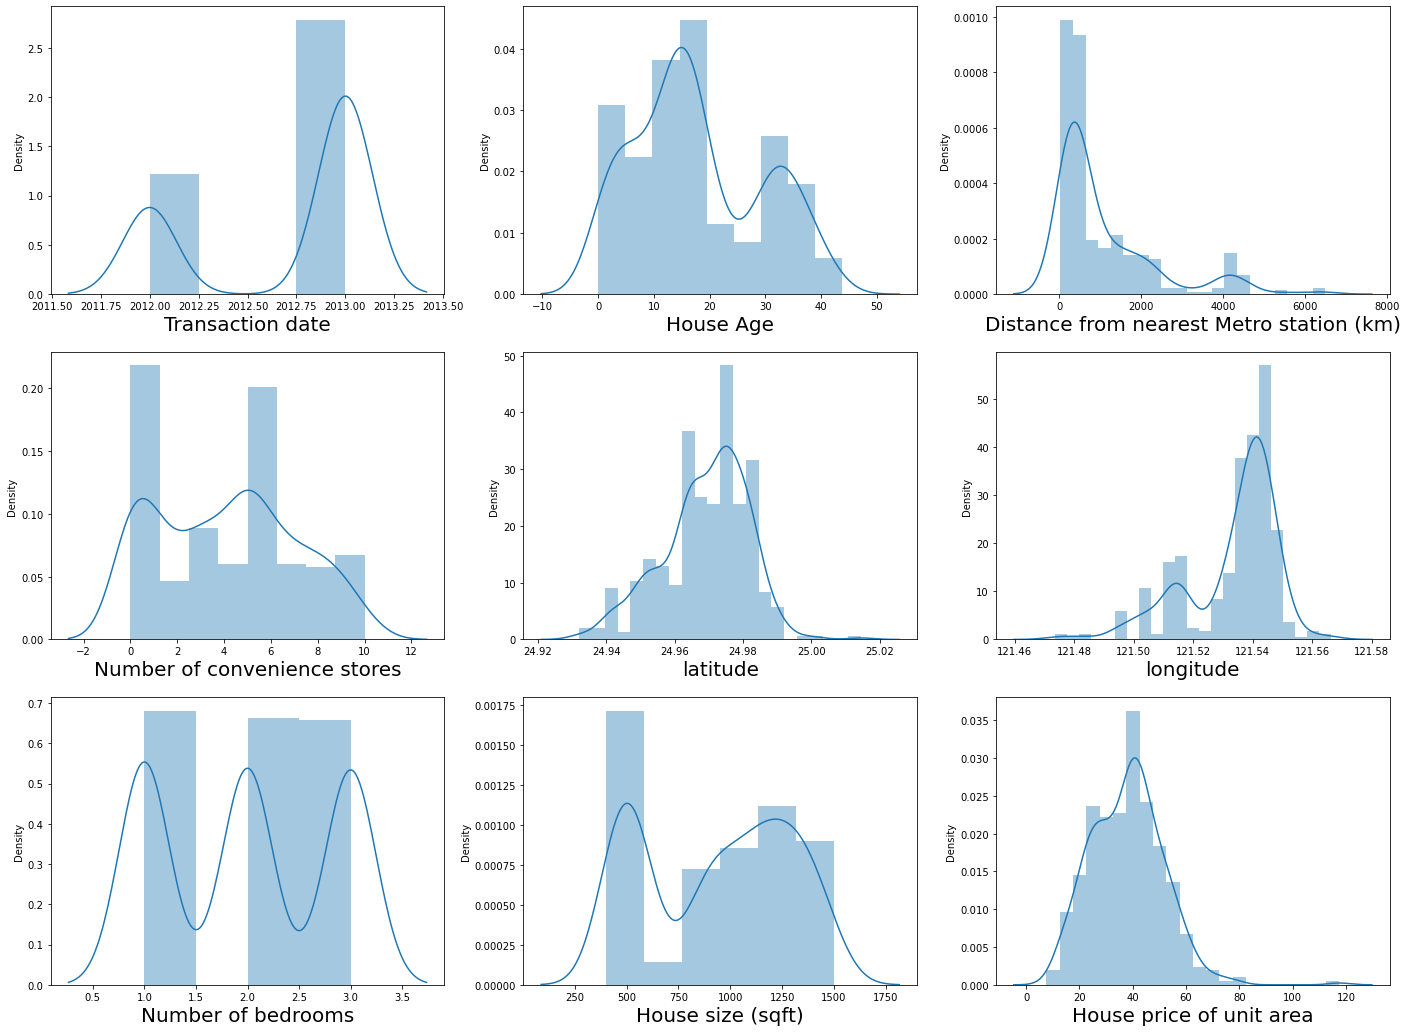

In [102]:
plt.figure(figsize=(24,18), facecolor='white')
plotnumber = 1

for column in df_1.columns[:]:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
Handling the Outliers

<AxesSubplot:xlabel='House size (sqft)'>

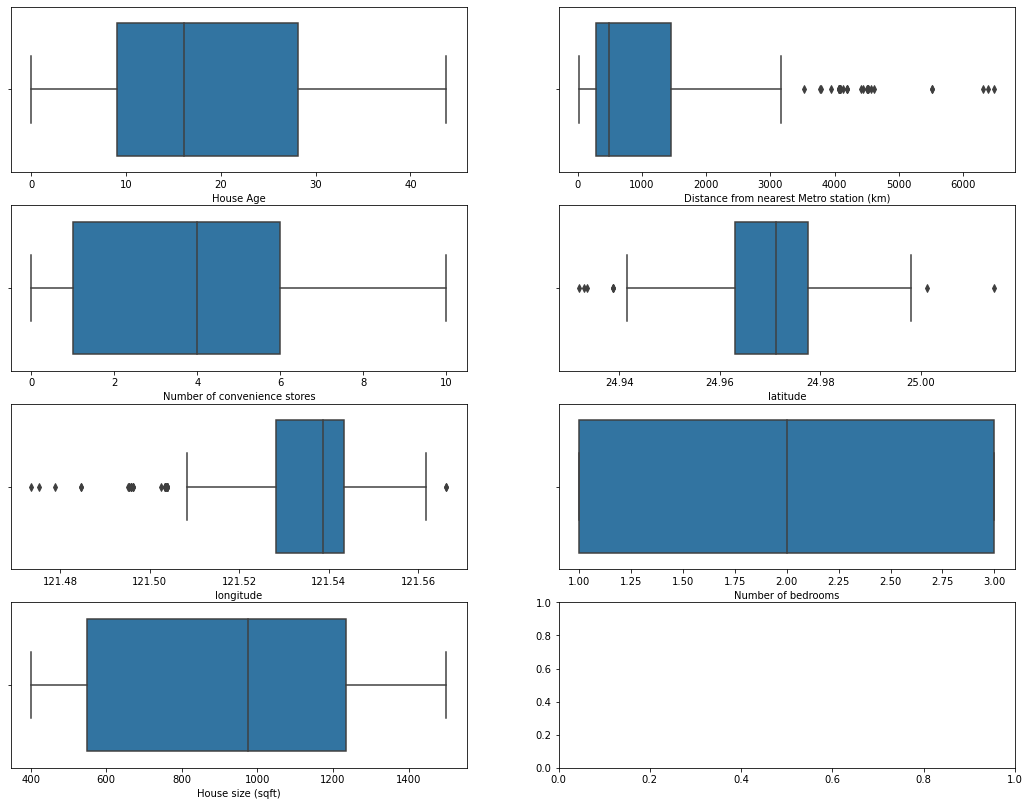

In [17]:
fig, axes = plt.subplots(4, 2, figsize=(18,14))
sns.boxplot(df_1['House Age'], ax=axes[0,0])
sns.boxplot(df_1['Distance from nearest Metro station (km)'], ax=axes[0,1])
sns.boxplot(df_1['Number of convenience stores'], ax=axes[1,0])
sns.boxplot(df_1['latitude'], ax=axes[1,1])
sns.boxplot(df_1['longitude'], ax=axes[2,0])
sns.boxplot(df_1['Number of bedrooms'], ax=axes[2,1])
sns.boxplot(df_1['House size (sqft)'], ax=axes[3,0])

From the above Box plot we can clearly identified the outliers in Distance from nearest Metro station (km)

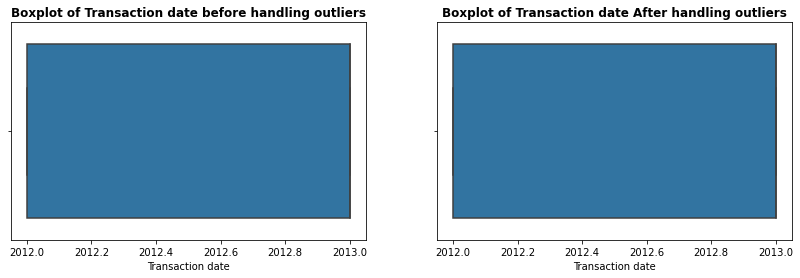

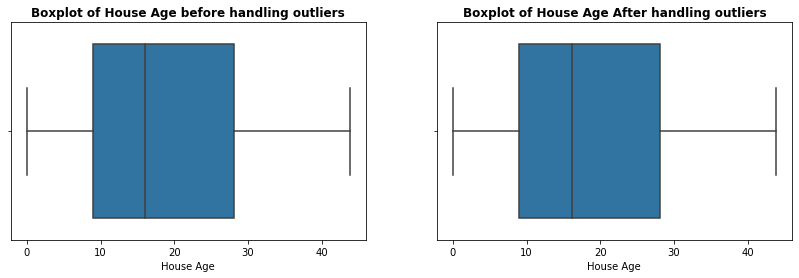

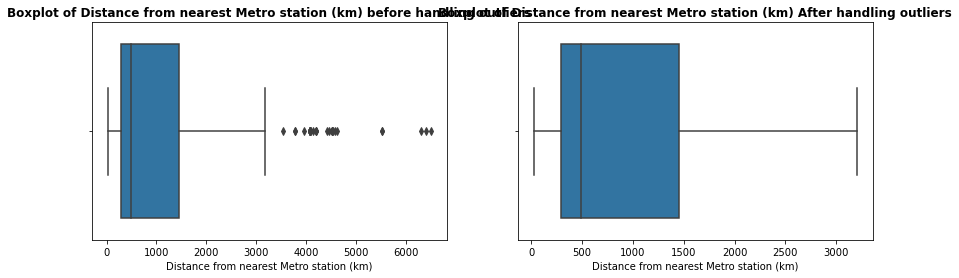

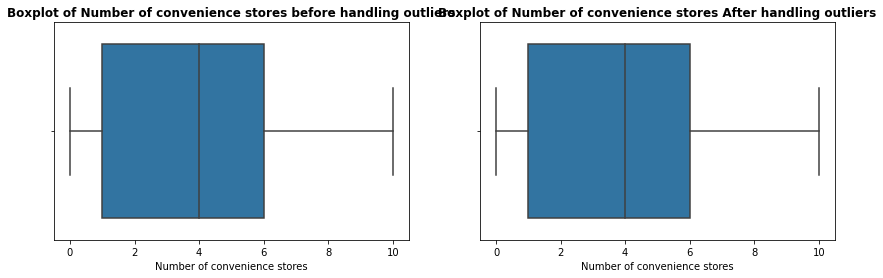

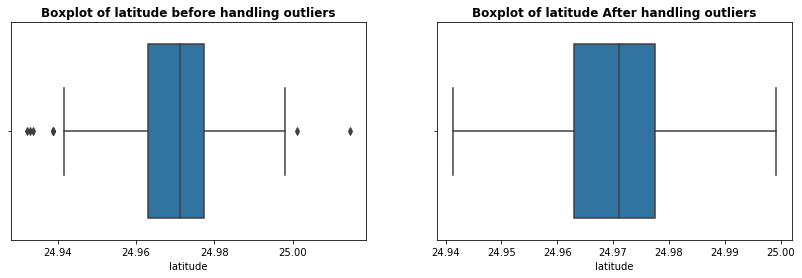

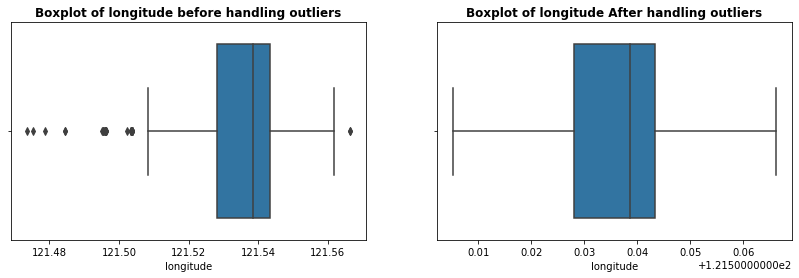

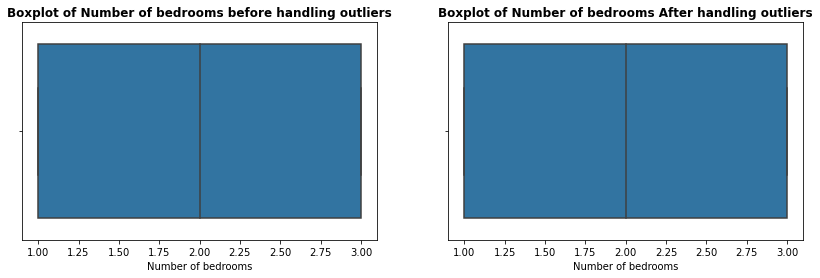

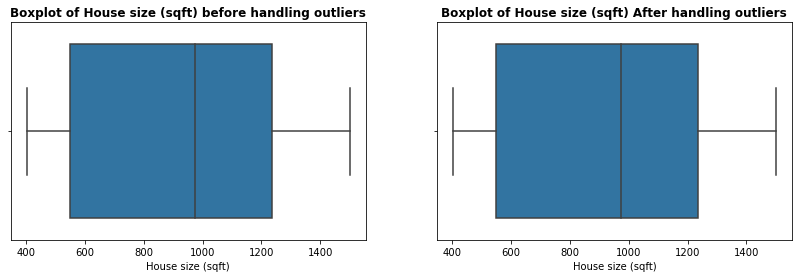

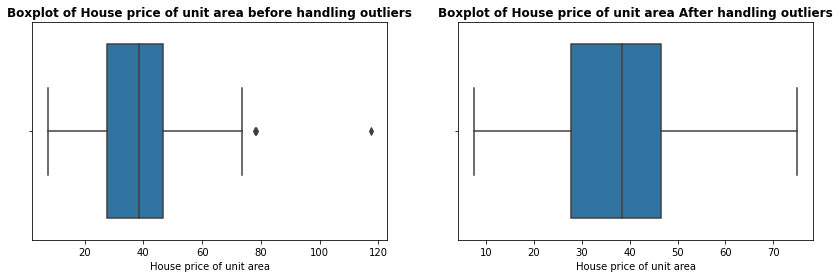

In [18]:
# Handling the outliers
df1 = df_1.copy()
hand_outliers = df1.columns

for i in range(len(hand_outliers)):
    IQR = df1[hand_outliers[i]].quantile(0.75) - df1[hand_outliers[i]].quantile(0.25)
    Lower_Limit = df1[hand_outliers[i]].quantile(0.25) - (1.5*IQR)
    UPPER_LIMIT = df1[hand_outliers[i]].quantile(0.75) + (1.5*IQR)
    df1[hand_outliers[i]]= np.where(df1[hand_outliers[i]]>UPPER_LIMIT,UPPER_LIMIT,
                                np.where(df1[hand_outliers[i]]<Lower_Limit,Lower_Limit,df1[hand_outliers[i]]))


for feauters in hand_outliers:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.boxplot(x = feauters, data = df_1)
    plt.title("Boxplot of {} before handling outliers".format(feauters),fontweight = 'bold')

    plt.subplot(122)
    sns.boxplot(x = feauters, data = df1)
    plt.title("Boxplot of {} After handling outliers".format(feauters),fontweight = 'bold')
    plt.show()

Feautre Selection 

In [19]:
df1.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.049171,0.015714,-0.005586,0.009288,0.014747,0.028743,0.025156,0.078648
House Age,0.049171,1.000000,-0.003782,0.049593,0.055848,-0.028578,-0.008756,-0.060361,-0.215673
Distance from nearest Metro station (km),0.015714,-0.003782,1.000000,-0.643701,-0.589290,-0.745523,-0.044811,-0.010879,-0.724550
Number of convenience stores,-0.005586,0.049593,-0.643701,1.000000,0.452041,0.448234,0.043638,0.033286,0.598823
latitude,0.009288,0.055848,-0.589290,0.452041,1.000000,0.395932,0.044957,0.028575,0.576873
longitude,0.014747,-0.028578,-0.745523,0.448234,0.395932,1.000000,0.038969,0.015922,0.531645
Number of bedrooms,0.028743,-0.008756,-0.044811,0.043638,0.044957,0.038969,1.000000,0.752276,0.052715
House size (sqft),0.025156,-0.060361,-0.010879,0.033286,0.028575,0.015922,0.752276,1.000000,0.038651
House price of unit area,0.078648,-0.215673,-0.724550,0.598823,0.576873,0.531645,0.052715,0.038651,1.000000


Text(0.5, 1.0, 'Visualization of Correlation')

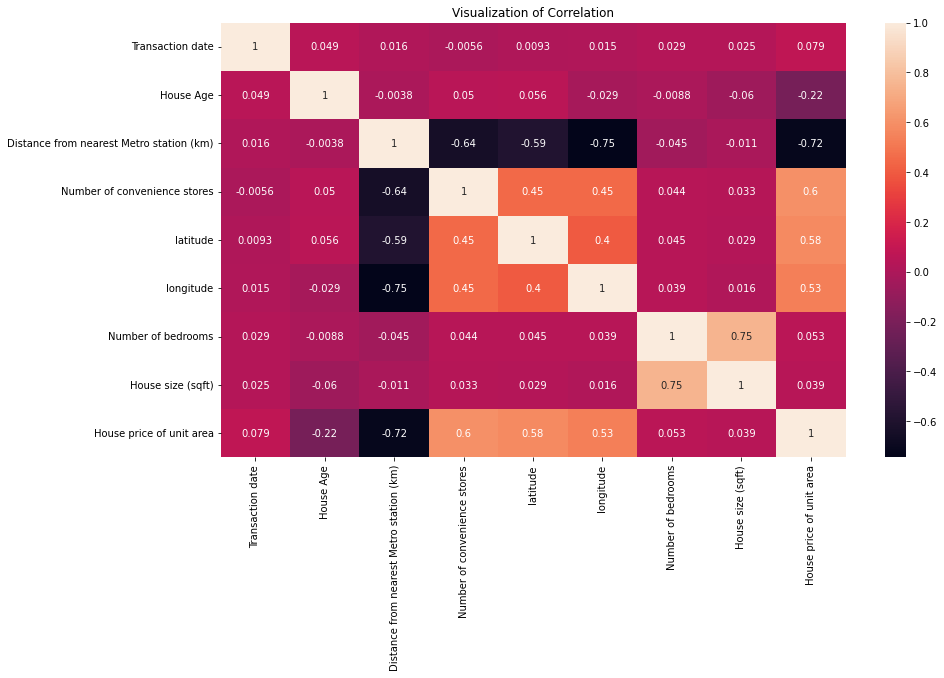

In [20]:
plt.subplots(figsize=(14,8))
sns.heatmap(df1.corr(),annot=True).set_title('Visualization of Correlation')

In [21]:
df1.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.0,32.0,84.88,10.0,24.98298,121.54024,1.0,575.0,37.9
1,2012.0,19.5,306.59,9.0,24.98034,121.53951,2.0,1240.0,42.2
2,2013.0,13.3,561.98,5.0,24.98746,121.54391,3.0,1060.0,47.3
3,2013.0,13.3,561.98,5.0,24.98746,121.54391,2.0,875.0,54.8
4,2012.0,5.0,390.57,5.0,24.97937,121.54245,1.0,491.0,43.1


Scaling and Transformation

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [84]:
df_scaler = scaler.fit_transform(df1)
df_scaler = pd.DataFrame(df_scaler).round(5)
df_scaler = df_scaler.rename(columns = {0:'Transaction date',1:'House Age',2:'Distance from nearest Metro station (km)',3:'Number of convenience stores',4:'latitude',5:'longitude',6:'Number of bedrooms',7:'House size (sqft)',8:'House price of unit area'})

In [85]:
df_scaler.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,-1.51186,1.25563,-0.91932,2.00741,1.15316,0.45530,-1.20790,-1.02292,0.00290
1,-1.51186,0.15709,-0.69022,1.66750,0.93435,0.40226,0.01477,0.88532,0.33124
2,0.66144,-0.38779,-0.42632,0.30788,1.52448,0.72196,1.23743,0.36880,0.72067
3,0.66144,-0.38779,-0.42632,0.30788,1.52448,0.72196,0.01477,-0.16206,1.29336
4,-1.51186,-1.11722,-0.60344,0.30788,0.85395,0.61588,-1.20790,-1.26396,0.39997


In [86]:
df_scaler.describe().round(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.00000,414.00000,414.00000,414.00000,414.00000,414.00000,414.00000,414.00000,414.00000
mean,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
std,1.00121,1.00121,1.00121,1.00121,1.00121,1.00121,1.00121,1.00121,1.00121
min,-1.51186,-1.55664,-0.98287,-1.39164,-2.29996,-2.08672,-1.20790,-1.51935,-2.31075
25%,-1.51186,-0.76349,-0.70806,-1.05173,-0.50285,-0.42789,-1.20790,-1.10040,-0.77595
50%,0.66144,-0.14172,-0.49839,-0.03202,0.16851,0.33831,0.01477,0.12489,0.04490
75%,0.66144,0.91728,0.49572,0.64779,0.69523,0.67800,1.23743,0.87025,0.66722
max,0.66144,2.29265,2.30140,2.00741,2.49234,2.33683,1.23743,1.63140,2.83197


Train and Test data split

In [87]:
x = df_scaler.drop(['Transaction date','House price of unit area'], axis = 1)
y = df_scaler['House price of unit area']

In [88]:
#import libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

#Import libraries for performance metrics
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

#Import library for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42 )

In [90]:
x_train.shape,y_train.shape

((277, 7), (277,))

In [91]:
x_test.shape,y_test.shape

((137, 7), (137,))

Model Building

In [92]:
report = []

In [93]:

models = {
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" : Ridge(),
    "Lasso Regression" : Lasso(),
    "Support Vector Regression" : SVR(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)   # Training Model

    # Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training Data perfomance Matrix
    model_train_mse = mean_squared_error(y_train,y_train_pred)   # Calculate MSE
    model_train_mae = mean_absolute_error(y_train,y_train_pred)  # Calculate MAE
    model_train_r2 = r2_score(y_train,y_train_pred)              # Calculate R2 sqaure
    model_train_ad_r2 = 1 - (1-model_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)   #Calculate Adjusted R2 square

    
    # Test Data perfomance Matrix
    model_test_mse = mean_squared_error(y_test,y_test_pred)   # Calculate MSE
    model_test_mae = mean_absolute_error(y_test,y_test_pred)  # Calculate MAE
    model_test_r2 = r2_score(y_test,y_test_pred)              # Calculate 2 sqaure
    model_test_ad_r2 = 1 - (1-model_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)  #Calculate Adjusted R2 square

    #Create a dataset for all the models with their performance metrics 
    report.append({
                    "model" : (list(models.keys()))[i],
                    'Train Mean Squared Error ' : model_train_mse,
                    'Test Mean Squared Error' : model_test_mse,
                    'Train Mean Absolute Error' : model_train_mae,
                    'Test Mean Absolute Error' : model_test_mae,
                    'Train R Sqaure' : model_train_r2,
                    'Test R Sqaure' : model_test_r2,
                    'Train Adj R Sqaure' : model_train_ad_r2,
                    'Test Adj R Sqaure' : model_test_ad_r2
    })

analyz_model = pd.DataFrame(report)
analyz_model

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Linear Regression,0.350185,0.389292,0.431510,0.430502,0.658727,0.583744,0.649847,0.561157
1,Ridge Regression,0.350195,0.388750,0.431744,0.430199,0.658718,0.584324,0.649837,0.561768
2,Lasso Regression,1.026116,0.953118,0.810551,0.803409,0.000000,-0.019135,-0.026022,-0.074437
3,Support Vector Regression,0.234861,0.308010,0.322246,0.398694,0.771116,0.670656,0.765160,0.652785
4,Decision Tree Regressor,0.000000,0.454232,0.000000,0.488135,1.000000,0.514306,1.000000,0.487950
5,Random Forest Regressor,0.043301,0.283864,0.146329,0.369324,0.957801,0.696475,0.956703,0.680004


Hyperparameter Tuning for Random Forest Regressor

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
Ran_param = {
    "max_depth" : [5,8,15,None,10],
    'max_features' : [3,'auto'],
    'min_samples_split' : [8,15,20],
    'n_estimators' : [50,100,150]
}


In [117]:
random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                   param_distributions = Ran_param,
                   n_iter= 75,
                   cv = 3,
                   verbose = 2,
                   n_jobs=-1)

In [125]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=75,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [3, 'auto'],
                                        'min_samples_split': [8, 15, 20],
                                        'n_estimators': [50, 100, 150]},
                   verbose=2)

In [126]:
random.best_params_,random.best_estimator_

({'n_estimators': 150,
  'min_samples_split': 8,
  'max_features': 3,
  'max_depth': 8},
 RandomForestRegressor(max_depth=8, max_features=3, min_samples_split=8,
                       n_estimators=150))

In [127]:

rf_best_para = RandomForestRegressor(max_depth=8, max_features=3, min_samples_split=8,
                                    n_estimators=150)

rf_best_para.fit(x_train,y_train)

# make predictions
rf_pred_train = rf_best_para.predict(x_train)
rf_pred_test = rf_best_para.predict(x_test)

# Training dataset performance matrix
rf_train_mse = mean_squared_error(y_train,rf_pred_train)   # Calculate MSE
rf_train_mae = mean_absolute_error(y_train,rf_pred_train)  # Calculate MAE
rf_train_r2 = r2_score(y_train,rf_pred_train)              # Calculate 2 sqaure
rf_train_ad_r2 = 1 - (1-rf_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)


# Test Data perfomance Matrix
rf_test_mse = mean_squared_error(y_test,rf_pred_test)   # Calculate MSE
rf_test_mae = mean_absolute_error(y_test,rf_pred_test)  # Calculate MAE
rf_test_r2 = r2_score(y_test,rf_pred_test)              # Calculate 2 sqaure
rf_test_ad_r2 = 1 - (1-rf_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

print("\n")
print("Hyperparameter tuning on random forest")

print("Model Performance For Training Data")
print("-Mean Squared Error : {:4f}".format(rf_train_mse))
print("-Mean Absolute Error : {:.4f}".format(rf_train_mae))
print("-R Sqaure : {:.4f}".format(rf_train_r2))
print("-Adj R Sqaure : {:.4f}".format(rf_train_ad_r2))

print("-----------------------------------------------------------------------")

print("Model Performance For Test Data")
print("-Mean Squared Error : {:4f}".format(rf_test_mse))
print("-Mean Absolute Error : {:.4f}".format(rf_test_mae))
print("-R Sqaure : {:.4f}".format(rf_test_r2))
print("-Adj R Sqaure : {:.4f}".format(rf_test_ad_r2))



Hyperparameter tuning on random forest
Model Performance For Training Data
-Mean Squared Error : 0.107127
-Mean Absolute Error : 0.2413
-R Sqaure : 0.8956
-Adj R Sqaure : 0.8929
-----------------------------------------------------------------------
Model Performance For Test Data
-Mean Squared Error : 0.256274
-Mean Absolute Error : 0.3513
-R Sqaure : 0.7260
-Adj R Sqaure : 0.7111


In [128]:
rf_record = []
rf_record.append({
                    "model" : "Hyper-Parameter Tunning on random forest",
                    "Train Mean Squared Error " : rf_train_mse,
                    "Test Mean Squared Error" : rf_test_mse,
                    "Train Mean Absolute Error" : rf_train_mae,
                    "Test Mean Absolute Error" : rf_test_mae,
                    "Train R Sqaure" : rf_train_r2,
                    "Test R Sqaure" : rf_test_r2,
                    "Train Adj R Sqaure" : rf_train_ad_r2,
                    "Test Adj R Sqaure" : rf_test_ad_r2
                    })

Hypertuned_rf = pd.DataFrame(rf_record)
Hypertuned_rf

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Hyper-Parameter Tunning on random forest,0.107127,0.256274,0.241268,0.351278,0.8956,0.725976,0.892883,0.711106


In [129]:
summary = [analyz_model,Hypertuned_rf]
all_models = pd.concat(summary) 
all_models.reset_index(inplace=True)
all_models.drop('index',axis = 1,inplace = True)
all_models.sort_values(by = 'Test R Sqaure',ascending=False)

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
6,Hyper-Parameter Tunning on random forest,0.107127,0.256274,0.241268,0.351278,0.895600,0.725976,0.892883,0.711106
5,Random Forest Regressor,0.043301,0.283864,0.146329,0.369324,0.957801,0.696475,0.956703,0.680004
3,Support Vector Regression,0.234861,0.308010,0.322246,0.398694,0.771116,0.670656,0.765160,0.652785
1,Ridge Regression,0.350195,0.388750,0.431744,0.430199,0.658718,0.584324,0.649837,0.561768
0,Linear Regression,0.350185,0.389292,0.431510,0.430502,0.658727,0.583744,0.649847,0.561157
4,Decision Tree Regressor,0.000000,0.454232,0.000000,0.488135,1.000000,0.514306,1.000000,0.487950
2,Lasso Regression,1.026116,0.953118,0.810551,0.803409,0.000000,-0.019135,-0.026022,-0.074437


In [130]:
print("\n")
print("Hyperparameter tuning on random forest")
print("**************************************")
print("\n")
print("Model Performance For Training Data")
print("-Mean Squared Error : {:4f}".format(rf_train_mse))
print("-Mean Absolute Error : {:.4f}".format(rf_train_mae))
print("-R Sqaure : {:.4f}".format(rf_train_r2))
print("-Adj R Sqaure : {:.4f}".format(rf_train_ad_r2))

print("-----------------------------------------------------------------------")

print("Model Performance For Test Data")
print("-Mean Squared Error : {:4f}".format(rf_test_mse))
print("-Mean Absolute Error : {:.4f}".format(rf_test_mae))
print("-R Sqaure : {:.4f}".format(rf_test_r2))
print("-Adj R Sqaure : {:.4f}".format(rf_test_ad_r2))



Hyperparameter tuning on random forest
**************************************


Model Performance For Training Data
-Mean Squared Error : 0.107127
-Mean Absolute Error : 0.2413
-R Sqaure : 0.8956
-Adj R Sqaure : 0.8929
-----------------------------------------------------------------------
Model Performance For Test Data
-Mean Squared Error : 0.256274
-Mean Absolute Error : 0.3513
-R Sqaure : 0.7260
-Adj R Sqaure : 0.7111


Summary
 * From the above all the model prediction and their performance metrics we conclude our best fit model.
 * Compare all the models with their accuracy and metrics, Random Forest got the best accuracy, still it has a overfitting issue in MSE(Compare with   Train and Test data MSE)
 * For that we performed Hyper-parameter tuning on Random forest. In that model tuning we use             parameters(max_depth,max_feautres,max_split,n_estimators)
 * The best fit model for this Prediction of House price based on the given feautres is Random Forest after Hyper-Parameter Tuned.